# Assignment 5: Exploratory Data Analysis and Hypothesis Testing

**Student:** [Junyoung Seo]

**Dataset:** [Online Shoppers Purchasing Intention]
  
**Date:** [10/06/2025]

## Objective
Perform exploratory data analysis (EDA) and hypothesis testing on thOnline Shoppers Purchasing Intention se dataset. Identify patterns and test meaningful hypotheses about relationships between variables.

---


## 1. Import Data and Libraries

Import the necessary libraries and load your dataset.


In [1]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# Set up plotting
plt.style.use('default')
sns.set_palette("husl")

print("Libraries imported successfully!")


Libraries imported successfully!


In [2]:
# Load your dataset here
df = pd.read_csv('online_shoppers_intention.csv')
print(f"Dataset shape: {df.shape}")
df.head()


Dataset shape: (12330, 18)


,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


Numerical : Administrative, Administrative_Duration, Informational, Informational_Duration, ProductRelated, ProductRelated_Duration, BounceRates, ExitRates, PageValues, SpecialDay, OperatingSystems, Browser, Region, TrafficType

Categorical : Month, VisitorType, Weekend(Bool), Revenue(Bool)

## 2. Exploratory Data Analysis (EDA)

Explore your dataset to understand its structure and identify patterns.


In [3]:
# Basic dataset information
print("=== DATASET OVERVIEW ===")
print(f"Shape: {df.shape}")
print(f"\nData types:")
print(df.dtypes)
print(f"\nMissing values:")
print(df.isnull().sum())
print(f"\nBasic statistics:")
df.describe()


=== DATASET OVERVIEW ===
Shape: (12330, 18)

Data types:
Administrative               int64
Administrative_Duration    float64
Informational                int64
Informational_Duration     float64
ProductRelated               int64
ProductRelated_Duration    float64
BounceRates                float64
ExitRates                  float64
PageValues                 float64
SpecialDay                 float64
Month                       object
OperatingSystems             int64
Browser                      int64
Region                       int64
TrafficType                  int64
VisitorType                 object
Weekend                       bool
Revenue                       bool
dtype: object

Missing values:
Administrative             0
Administrative_Duration    0
Informational              0
Informational_Duration     0
ProductRelated             0
ProductRelated_Duration    0
BounceRates                0
ExitRates                  0
PageValues                 0
SpecialDay           

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,OperatingSystems,Browser,Region,TrafficType
count,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000
mean,2.315166,80.818611,0.503569,34.472398,31.731468,1194.746220,0.022191,0.043073,5.889258,0.061427,2.124006,2.357097,3.147364,4.069586
std,3.321784,176.779107,1.270156,140.749294,44.475503,1913.669288,0.048488,0.048597,18.568437,0.198917,0.911325,1.717277,2.401591,4.025169
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,7.000000,184.137500,0.000000,0.014286,0.000000,0.000000,2.000000,2.000000,1.000000,2.000000
50%,1.000000,7.500000,0.000000,0.000000,18.000000,598.936905,0.003112,0.025156,0.000000,0.000000,2.000000,2.000000,3.000000,2.000000
75%,4.000000,93.256250,0.000000,0.000000,38.000000,1464.157214,0.016813,0.050000,0.000000,0.000000,3.000000,2.000000,4.000000,4.000000
max,27.000000,3398.750000,24.000000,2549.375000,705.000000,63973.522230,0.200000,0.200000,361.763742,1.000000,8.000000,13.000000,9.000000,20.000000


=== TARGET VARIABLE ===
Target distribution:
Revenue
False    10422
True      1908
Name: count, dtype: int64


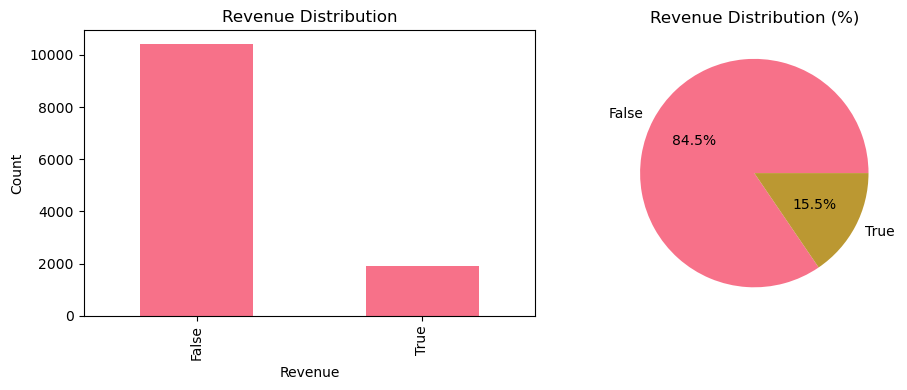

In [11]:
# Target variable analysis
print("=== TARGET VARIABLE ===")
revenue_counts = df['Revenue'].value_counts()
print(f"Target distribution:")
print(revenue_counts)

# Visualize Revenue distribution
plt.figure(figsize=(10, 4))

plt.subplot(1, 2, 1)
revenue_counts.plot(kind='bar')
plt.title('Revenue Distribution')
plt.xlabel('Revenue')
plt.ylabel('Count')

plt.subplot(1, 2, 2)
plt.pie(revenue_counts.values, labels=revenue_counts.index, autopct='%1.1f%%')
plt.title('Revenue Distribution (%)')

plt.tight_layout()
plt.show()


Of the total sessions in the dataset, only about 15.5% resulted in an actual purchase (Revenue = True), while 84.5% did not. This indicates a typical imbalanced distribution.

=== NUMERICAL VARIABLES ===
Numerical columns: ['Administrative', 'Administrative_Duration', 'Informational', 'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration', 'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay', 'OperatingSystems', 'Browser', 'Region', 'TrafficType']


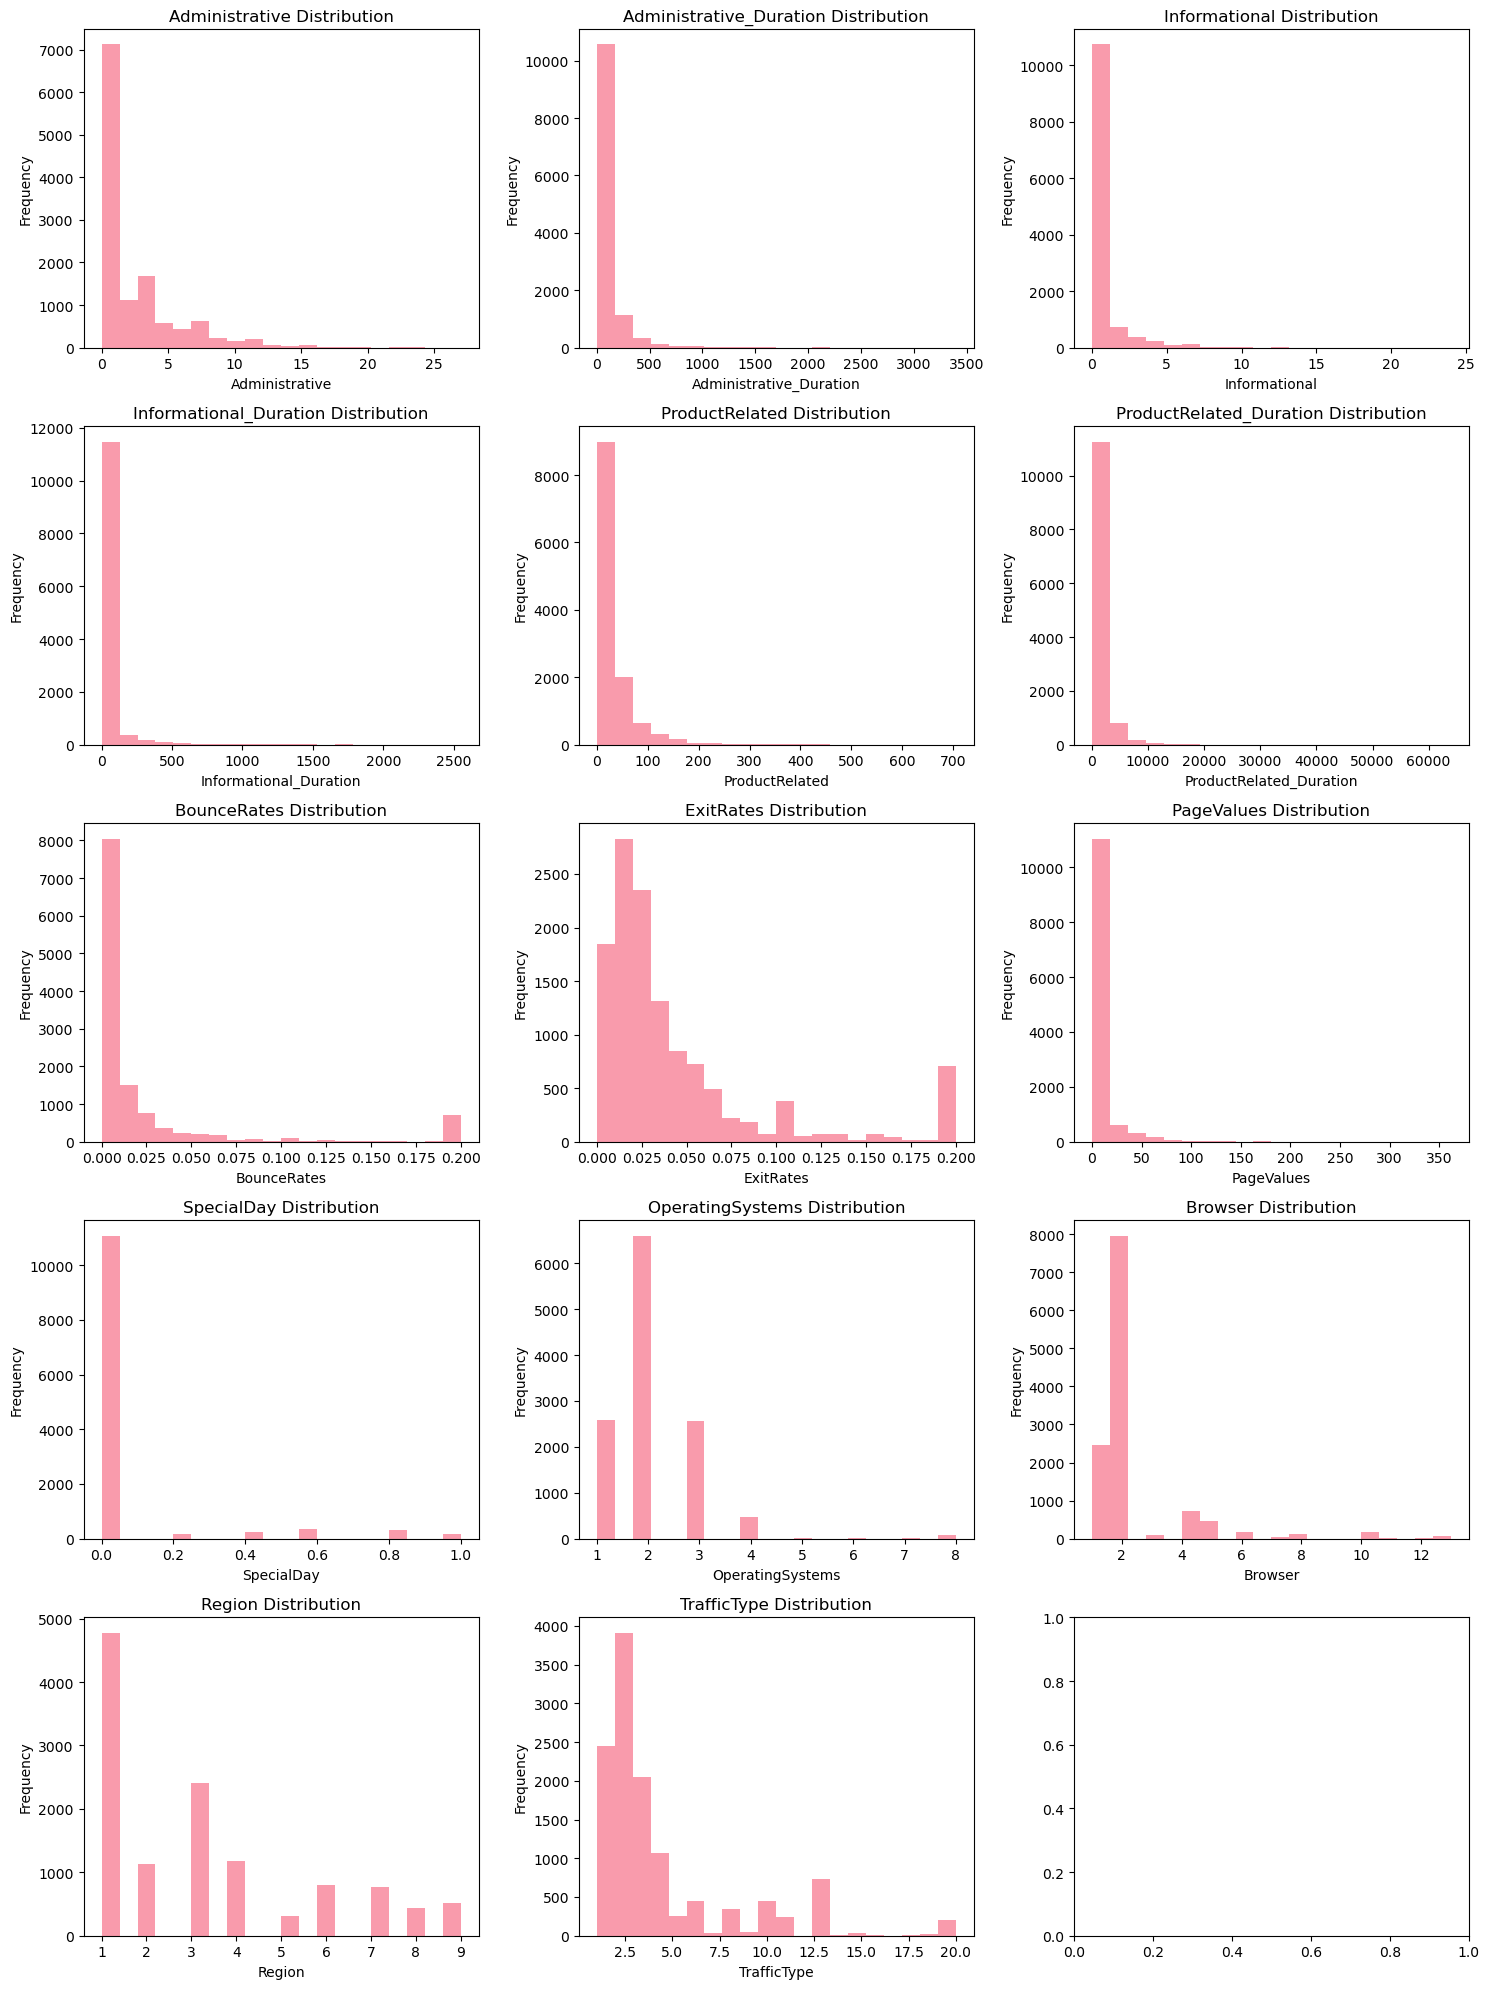

In [25]:
# Numerical variables analysis
print("=== NUMERICAL VARIABLES ===")
numerical_cols = df.select_dtypes(include=[np.number]).columns
print(f"Numerical columns: {list(numerical_cols)}")

# Create histograms for numerical variables
n_cols = 3
n_rows = int(np.ceil(len(numerical_cols) / n_cols))
fig, axes = plt.subplots(n_rows, n_cols, figsize=(5*n_cols, 4*n_rows))
axes = np.atleast_1d(axes).ravel()

if len(numerical_cols) == 1:
    axes = [axes]

for i, col in enumerate(numerical_cols):
    axes[i].hist(df[col], bins=20, alpha=0.7)
    axes[i].set_title(f'{col} Distribution')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Frequency')

plt.tight_layout()
plt.show()


Most numerical variables exhibit a right-skewed distribution, indicating that the majority of user sessions involve low page visits, short durations, and low engagement metrics, while a small number of sessions show exceptionally high values.

=== CATEGORICAL VARIABLES ===
Categorical columns: ['Month', 'VisitorType']

Month value counts:
Month
May     3364
Nov     2998
Mar     1907
Dec     1727
Oct      549
Sep      448
Aug      433
Jul      432
June     288
Feb      184
Name: count, dtype: int64


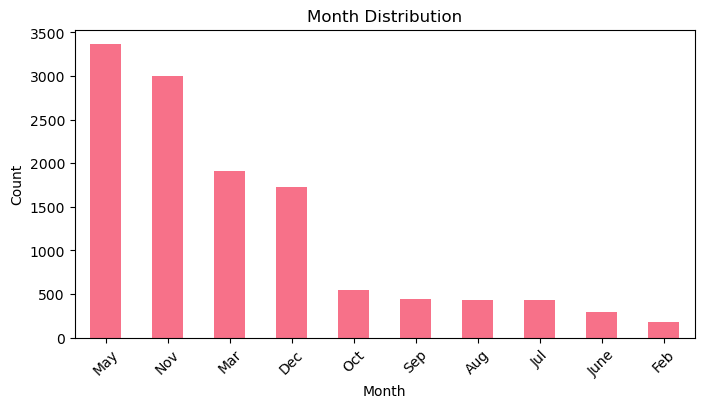


VisitorType value counts:
VisitorType
Returning_Visitor    10551
New_Visitor           1694
Other                   85
Name: count, dtype: int64


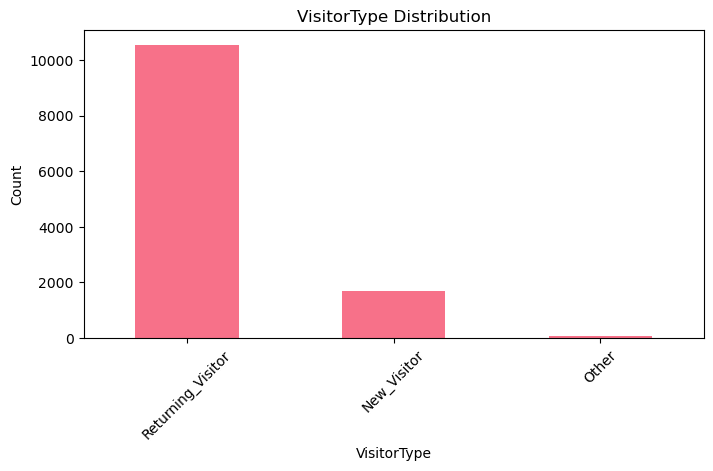

In [17]:
# Categorical variables analysis
print("=== CATEGORICAL VARIABLES ===")
categorical_cols = df.select_dtypes(include=['object']).columns
print(f"Categorical columns: {list(categorical_cols)}")

for col in categorical_cols:
    print(f"\n{col} value counts:")
    print(df[col].value_counts())
    
    # Create bar plot
    plt.figure(figsize=(8, 4))
    df[col].value_counts().plot(kind='bar')
    plt.title(f'{col} Distribution')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    plt.show()


The majority of sessions (approximately 85.6%) are from returning visitors, while new visitors account for 13.7% and others are negligible. Also session activity peaks in May and November, which together account for more than half of all sessions.

=== CORRELATION ANALYSIS ===


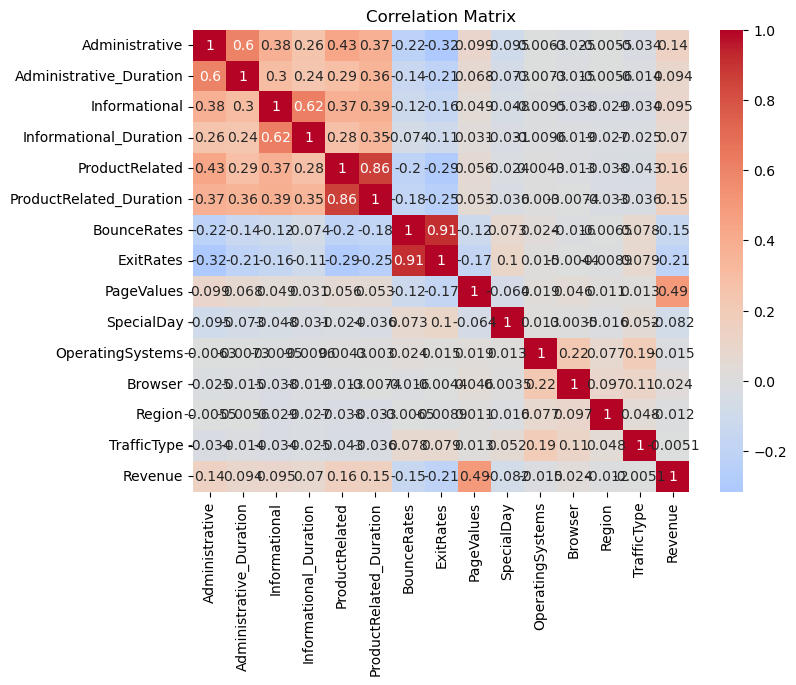

In [20]:
# Correlation analysis
print("=== CORRELATION ANALYSIS ===")

numeric_df = df.select_dtypes(include=[np.number])

revenue_num = (
    df['Revenue']
    .astype(str)
    .str.lower()
    .map({'true': 1, 'false': 0})
    .astype(int)
)
numeric_df = numeric_df.copy()
numeric_df['Revenue'] = revenue_num

correlation_matrix = numeric_df.corr()

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix')
plt.show()

# Show correlations with target variable
if 'target' in df.columns:
    target_correlations = correlation_matrix['target'].sort_values(ascending=False)
    print("\nCorrelations with target variable:")
    print(target_correlations)


Top 3 correlatation with Revenue:

PageValues & Revenue : 0.49

ExitRates & Revenue : -0.21

ProductRelated_Duration & Revenue : 0.16

=== RELATIONSHIPS WITH Revenue ===


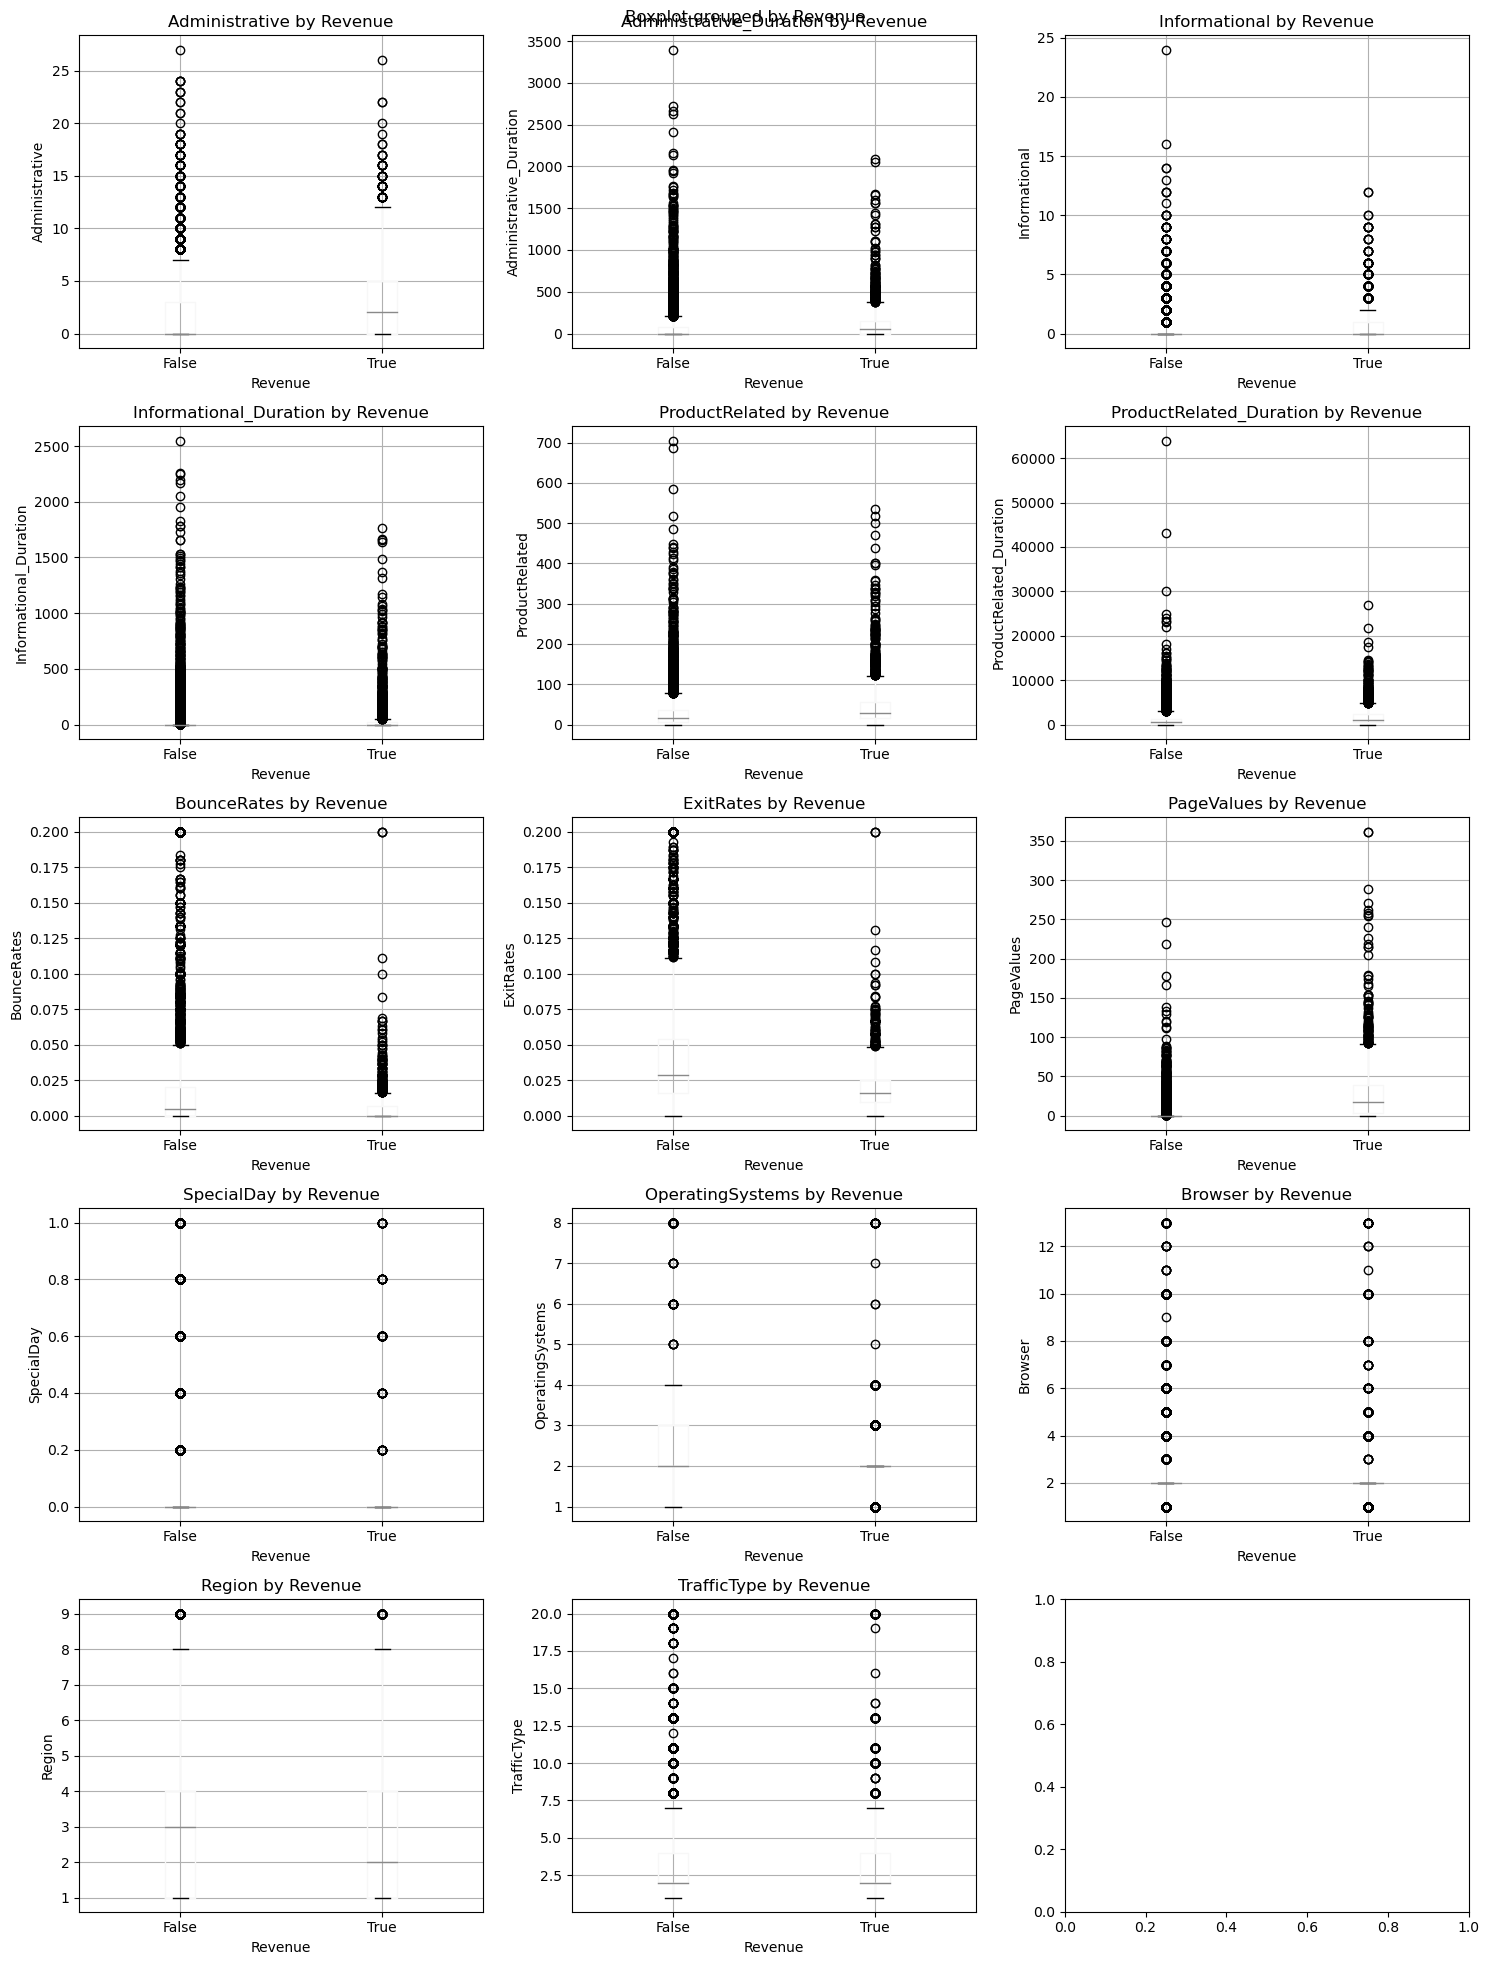


Month vs Revenue:
Revenue  False  True 
Month                
Aug      0.824  0.176
Dec      0.875  0.125
Feb      0.984  0.016
Jul      0.847  0.153
June     0.899  0.101
Mar      0.899  0.101
May      0.891  0.109
Nov      0.746  0.254
Oct      0.791  0.209
Sep      0.808  0.192

VisitorType vs Revenue:
Revenue            False  True 
VisitorType                    
New_Visitor        0.751  0.249
Other              0.812  0.188
Returning_Visitor  0.861  0.139


In [23]:
# Relationship between variables and target
print("=== RELATIONSHIPS WITH Revenue ===")

# Box plots for numerical variables vs revenue
numerical_cols_no_revenue = [col for col in numerical_cols if col != 'Revenue']

if len(numerical_cols_no_revenue) > 0:
    n_cols = 3
    n_rows = int(np.ceil(len(numerical_cols_no_target) / n_cols))
    fig, axes = plt.subplots(n_rows, n_cols, figsize=(5*n_cols, 4*n_rows))
    axes = np.array(axes).reshape(-1)
    
    for i, col in enumerate(numerical_cols_no_revenue):
        df.boxplot(column=col, by='Revenue', ax=axes[i])
        axes[i].set_title(f'{col} by Revenue')
        axes[i].set_xlabel('Revenue')
        axes[i].set_ylabel(col)
    
    plt.tight_layout()
    plt.show()

# Crosstabs for categorical variables vs revenue
for col in categorical_cols:
    print(f"\n{col} vs Revenue:")
    crosstab = pd.crosstab(df[col], df['Revenue'], normalize='index')
    print(crosstab.round(3))


There are a few key patterns in the results:

Monthly Differences: Purchase rates vary clearly by month, with November showing the highest rate (25.4%) and February the lowest (1.6%), reflecting strong seasonal effects.

Visitor Type: New Visitors have a higher purchase rate than Returning Visitors, which is an interesting deviation from typical patterns.

ExitRates: Purchasing sessions show significantly lower ExitRates, indicating less site abandonment.

PageValues: Buyers accumulate much higher PageValues, suggesting stronger engagement with high-value pages.

Product-Related Behavior: Purchasing users view and spend more time on product-related pages, showing deeper browsing before conversion.

## 3. Hypothesis Formulation

Based on your EDA, formulate **2-3 testable hypotheses**. Each hypothesis should be:
- Clear and specific
- Testable with statistical methods
- Grounded in your observations

### Hypothesis 1: [Monthly Differences in Purchase Rates]
**H1:** [The proportion of sessions resulting in a purchase differs by month.]
- **Null Hypothesis (H0):** [The proportion of Revenue (purchase rate) is the same across all months.]
- **Alternative Hypothesis (H1):** [At least one month has a different purchase rate compared to the others.]
- **Rationale:** [Some specific months show higher purchase rate due to holiday promotion such as Black Friday or Christmas Sales, while other months may show lower baseline activity.The correlation between Month and Revenue showed noticeable differences in proportions, motivating a chi-squared test of independence.]

### Hypothesis 2: [ExitRates and Purchase Behavior]
**H2:** [Sessions that lead to purchases have lower average ExitRates than sessions without purchases.]
- **Null Hypothesis (H0):** [The mean ExitRates are equal for purchasing and non-purchasing sessions.]
- **Alternative Hypothesis (H1):** [The mean ExitRates differ between purchasing and non-purchasing sessions]
- **Rationale:** [ExitRates reflect the likelihood of leaving the website from a particular page. Higher ExitRates generally indicate user drop-off, which should be less common in sessions that result in a purchase. The heatmap revealed a moderate negative correlation between ExitRates and Revenue, suggesting that lower ExitRates may be associated with higher purchase likelihood.]

### Hypothesis 3: [PageValues and Purchase Behavior]
**H3:** [Sessions that lead to purchases have higher average PageValues than sessions without purchases.]
- **Null Hypothesis (H0):** [The mean PageValues are equal for purchasing and non-purchasing sessions.]
- **Alternative Hypothesis (H1):** [The mean PageValues differ between purchasing and non-purchasing sessions.]
- **Rationale:** [PageValues indicate the expected monetary value of pages viewed during a session. Purchasing sessions usually involve more engagement with high-value pages, resulting in much higher PageValues compared to non-purchasing sessions. The heatmap showed a strong positive correlation between PageValues and Revenue]

---


## 4. Hypothesis Testing

Test each hypothesis using appropriate statistical methods. For each test, explain:
- Why you chose this test
- The results and interpretation
- Whether you reject or fail to reject the null hypothesis


### Testing Hypothesis 1: [Monthly Differences in Purchase Rates]

**Test Choice:** [chi-square]
- **Why appropriate:** [Both Month and Revenue are categorical variables. The chi-square test is suitable for checking whether the distribution of purchase rates differs across months by comparing observed and expected frequencies in a contingency table.]


In [29]:
# Hypothesis 1 Testing
print("=== TESTING HYPOTHESIS 1 ===")

# using chi-square for hypothesis testing
# 1. Prepare your data
# Create a contingency table of Month vs Revenue
table = pd.crosstab(df['Month'], df['Revenue'])
print("Contingency Table:\n", table)

# 2. Chi-square test
chi2, p, dof, expected = chi2_contingency(table)

# 3. Perform Chi-squared Test
print("\nChi-squared Test Results:")
print(f"Chi2 Statistic = {chi2:.4f}")
print(f"Degrees of Freedom = {dof}")
print(f"P-value = {p_value:.6f}")

# 4. Interpret results
if p < 0.05:
    print("→ Reject H0")
else:
    print("→ Fail to reject H0")

=== TESTING HYPOTHESIS 1 ===
Contingency Table:
 Revenue  False  True 
Month                
Aug        357     76
Dec       1511    216
Feb        181      3
Jul        366     66
June       259     29
Mar       1715    192
May       2999    365
Nov       2238    760
Oct        434    115
Sep        362     86

Chi-squared Test Results:
Chi2 Statistic = 384.9348
Degrees of Freedom = 9
P-value = 0.000000
→ Reject H0


Since we reject H0 at a = 0.05, this indicates that there is a significant difference in purchase rates across months.

### Testing Hypothesis 2: [ExitRates and Purchase Behavior]

**Test Choice:** [t-test]
- **Why appropriate:** [Revenue is a binary categorical variable and ExitRates is a continuous variable. A t-test is appropriate for comparing the mean ExitRates between the two groups to determine whether there is a statistically significant difference in exit behavior depending on purchase outcome.]


In [31]:
# Hypothesis 2 Testing
print("=== TESTING HYPOTHESIS 2 ===")
from scipy import stats


# 1. Split into two groups
group_false = df[df['Revenue'] == False]['ExitRates']
group_true = df[df['Revenue'] == True]['ExitRates']

# 2. Perform Welch's t-test (unequal variances)
t_stat, p_value = stats.ttest_ind(group_true, group_false, equal_var=False)

# 3. Print results
print(f"t-statistic: {t_stat:.4f}")
print(f"p-value: {p_value:.6f}")

# 4. Interpretation
if p_value < 0.05:
    print("→ Reject H0")
else:
    print("→ Fail to reject H0")

=== TESTING HYPOTHESIS 2 ===
t-statistic: -44.3321
p-value: 0.000000
→ Reject H0


The t-test shows a very large t-statistic (−44.33) and a p-value < 0.001, indicating a highly significant difference in ExitRates between sessions that resulted in a purchase and those that did not.
This may indicate users who made a purchase tend to have significantly lower ExitRates compared to non-purchasing users.

### Testing Hypothesis 3: [PageValues and Purchase Behavior]

**Test Choice:** [t-test]
- **Why appropriate:** [Revenue is a binary categorical variable, and PageValues is a continuous variable. A t-test is appropriate for comparing the mean PageValues between purchasing and non-purchasing groups to determine whether there is a statistically significant difference in page engagement and value associated with purchase behavior.]


In [32]:
# Hypothesis 3 Testing (if applicable)
print("=== TESTING HYPOTHESIS 3 ===")
from scipy import stats


# 1. Split into two groups
group_false = df[df['Revenue'] == False]['PageValues']
group_true = df[df['Revenue'] == True]['PageValues']

# 2. Perform Welch's t-test (unequal variances)
t_stat, p_value = stats.ttest_ind(group_true, group_false, equal_var=False)

# 3. Print results
print(f"t-statistic: {t_stat:.4f}")
print(f"p-value: {p_value:.6f}")

# 4. Interpretation
if p_value < 0.05:
    print("→ Reject H0")
else:
    print("→ Fail to reject H0")


=== TESTING HYPOTHESIS 3 ===
t-statistic: 31.1992
p-value: 0.000000
→ Reject H0


The t-test result shows a very large positive t-statistic (31.20) and a p-value < 0.001, indicating a highly significant difference in PageValues between purchasing and non-purchasing sessions.

This indicates sessions that resulted in a purchase have significantly higher PageValues compared to sessions without a purchase, suggesting stronger engagement and higher page value accumulation among purchasing users.

## 5. Summary and Conclusions

### Key Findings from EDA:
1. [Main Observation]
- Only 15.5% of sessions resulted in a purchase, showing a clear imbalance between purchasing and non-purchasing sessions.
- Most numerical features are right-skewed, indicating that most users have low engagement, while a small number show extremely high activity.
- The majority of sessions come from returning visitors (85.6%), with session activity peaking in May and November.
2. [Patterns]
- Purchase rates vary significantly by month, with November showing the highest (25.4%) and February the lowest (1.6%).
- New visitors display a higher purchase rate than returning visitors, which is an interesting deviation from typical trends.
- Purchasing sessions have lower ExitRates, higher PageValues, and longer product-related activity.
  
3. [Interesting Relationships]
- PageValues has the strongest positive correlation with Revenue (0.49).
- ExitRates is moderately negatively correlated with Revenue (−0.21).
- Seasonal factors and engagement behavior together strongly influence purchase likelihood.

### Hypothesis Testing Results:

| Hypothesis | Test Used | p-value | Result | Interpretation |
|------------|-----------|---------|--------|-----------------|
| **H1** | [Chi-Square] | [0.0000] | [Significant] | [Purchase rates vary significantly across months, indicating strong seasonal effects.] |
| **H2** | [T-Test] | [0.0000] | [Significant] | [ExitRates differ significantly between purchasing and non-purchasing sessions, with buyers showing lower ExitRates.] |
| **H3** | [T-Test] | [0.0000] | [Significant] | [PageValues are significantly higher for purchasing sessions, reflecting stronger engagement with high-value pages.] |

### Key Insights:
- [Result]
  * Purchase behavior is influenced by both seasonal trends and user engagement patterns.
  * November shows the highest purchase rate, reflecting strong seasonal effects.
  * PageValues, ExitRates, and product-related activity clearly distinguish purchasing sessions from non-purchasing ones.
  * Purchasing users tend to have higher engagement and lower abandonment rates.
- [Practical Implications]
  * Focus marketing and promotional efforts during specific months such as November.
  * Improve product page design and engagement to encourage user interaction and conversions.
  * Monitor and reduce ExitRates to minimize session drop-offs. (Maybe some extra promotions on non-holiday)
  * Use PageValues as an early behavioral indicator for targeted marketing or personalized offers.
- [Limitations]
  * The dataset is imbalanced (only 15.5% purchases), which can influence test results and model performance.
  * External factors such as pricing, promotions, or ad campaigns are not included in the dataset.
  * The findings are correlational, not causal, so direct cause-effect relationships cannot be confirmed.

### Future Research:
- Use predictive modeling (linear regression, random forest, etc.) to estimate purchase likelihood based on behavioral variables.
  * Since EDA is already done, finding the best fit model might be the next step.
- Apply some time-series or trend analysis to understand long-term seasonal effects on purchasing behavior.

---

**Note:** Remember to replace the sample data with your actual dataset and fill in all the template sections with your own analysis and interpretations.


In [33]:
# Final summary
print("=== ANALYSIS COMPLETE ===")
print(f"Dataset analyzed: [Online Shoppers Purchasing Intention]")
print(f"Sample size: {len(df)} observations")
print(f"Number of features: {df.shape[1]-1} (excluding target)")
print(f"\nAnalysis completed successfully!")
print("\nRemember to:")
print("1. Replace sample data with your actual dataset")
print("2. Fill in all template sections with your analysis")
print("3. Provide clear explanations for your choices")
print("4. Interpret your results meaningfully")


=== ANALYSIS COMPLETE ===
Dataset analyzed: [Online Shoppers Purchasing Intention]
Sample size: 12330 observations
Number of features: 17 (excluding target)

Analysis completed successfully!

Remember to:
1. Replace sample data with your actual dataset
2. Fill in all template sections with your analysis
3. Provide clear explanations for your choices
4. Interpret your results meaningfully
